In [1]:
import pandas as pd

In [2]:
#imena stupaca u CTG.xls koje ćemo koristiti
column_names = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max',
                   'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']

#stupci koji sadrže int vrijednosti, samo za ljepši ispis
int_columns = ['LB' ,'ASTV' ,'ALTV' ,'Width' ,'Min' ,'Max' ,'Nmax' ,'Nzeros' ,'Mode' ,'Mean' ,'Median' ,'Variance',
               'Tendency', 'NSP']

In [3]:
data = pd.read_excel('CTG.xls', sheet_name = 'Data', skiprows = 1, 
                     usecols = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 45]
                     , names = column_names)

#izbacujemo sve retke u kojima je barem jedna varijabla nepoznata (NaN)
data = data.dropna()

for col in int_columns:
    data[col] = (data[col]).astype(int)

In [56]:
data.head(15)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
5,134,0.001049,0.000000,0.010493,0.009444,0.0,0.002099,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3
6,134,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29,6.3,0,...,50,200,6,3,71,107,106,215,0,3
7,122,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83,0.5,6,...,62,130,0,0,122,122,123,3,1,3
8,122,0.000000,0.000000,0.001517,0.000000,0.0,0.000000,84,0.5,5,...,62,130,0,0,122,122,123,3,1,3
9,122,0.000000,0.000000,0.002967,0.000000,0.0,0.000000,86,0.3,6,...,62,130,1,0,122,122,123,1,1,3


Podjela podataka u 10 podskupova za cross-validaciju (sačuvan omjer NSP kao u početnom datasetu zbog stratifikacije):

In [60]:
X = data.iloc[:,0:-1].values 
y = data.iloc[:,-1].values # NSP dijagnoza

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold

random_state = 164981614

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=random_state)

X_train, X_test, y_train, y_test = [], [], [], []

for train_index, test_index in rskf.split(X, y):
    X_train.append(X[train_index])
    X_test.append(X[test_index])
    y_train.append(y[train_index])
    y_test.append(y[test_index])

In [62]:
for i in range (10):
    print(i)
    print("Veličina train seta: ",len(X_train[i]))
    print("Veličina test seta: ",len(X_test[i]))

0
Veličina train seta:  1912
Veličina test seta:  214
1
Veličina train seta:  1912
Veličina test seta:  214
2
Veličina train seta:  1912
Veličina test seta:  214
3
Veličina train seta:  1912
Veličina test seta:  214
4
Veličina train seta:  1912
Veličina test seta:  214
5
Veličina train seta:  1914
Veličina test seta:  212
6
Veličina train seta:  1915
Veličina test seta:  211
7
Veličina train seta:  1915
Veličina test seta:  211
8
Veličina train seta:  1915
Veličina test seta:  211
9
Veličina train seta:  1915
Veličina test seta:  211


In [130]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#skaliranje ne radi ? (iz kaggle koda - popravi)

In [75]:
#import sys

In [76]:
#!{sys.executable} -m pip install xgboost

In [107]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [108]:
#xgb na prvom (train, test) za cross-validation

model = xgb.XGBClassifier()
model.fit(X_train[0], y_train[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
y_pred = model.predict(X_test[0])
predictions = [round(value) for value in y_pred]

In [110]:
# evaluate model's predictions
accuracy = accuracy_score(y_test[0], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.39%


The score is : 0.9439252336448598


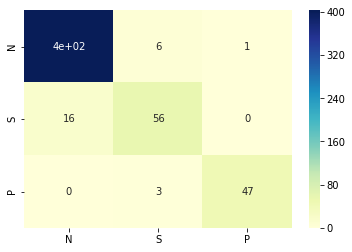

In [111]:
cm = confusion_matrix(y_test[0], y_pred)
print('The score is : '+str(accuracy))   
label = ["N","S","P"]
sns.heatmap(cm1, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [124]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [125]:
#xgb na (train, test) dobivenom slučajnom podjelom u omjeru 7 : 3 

model1 = xgb.XGBClassifier()
model1.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
y1_pred = model1.predict(X1_test)
predictions1 = [round(value) for value in y1_pred]

In [127]:
accuracy1 = accuracy_score(y1_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 95.14%


The score is : 0.95141065830721


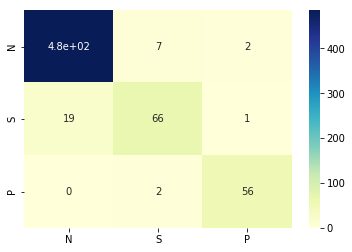

In [128]:
cm1 = confusion_matrix(y1_test, y1_pred)
print('The score is : '+str(accuracy1))   
label = ["N","S","P"]
sns.heatmap(cm1, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [129]:
target_names = ['N', 'S', 'P']
print(classification_report(y1_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

           N       0.96      0.98      0.97       494
           S       0.88      0.77      0.82        86
           P       0.95      0.97      0.96        58

   micro avg       0.95      0.95      0.95       638
   macro avg       0.93      0.90      0.92       638
weighted avg       0.95      0.95      0.95       638

